In [22]:
import ipywidgets as widget
from IPython.display import display
import pandas as pd 
import numpy as np
import edhc as erk

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

<AxesSubplot:>

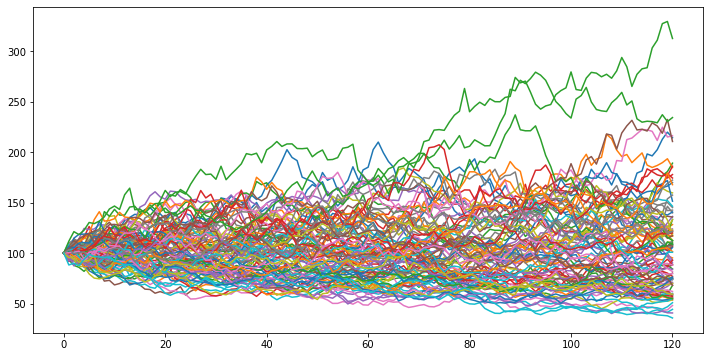

In [4]:
erk.gbm(10, 100, mu=0.01).plot(legend=False, figsize=(12,6))

In [5]:
def show_gbm(n_scenario, mu, sigma):
    s_0 = 100
    prices = erk.gbm(n_scenarios=n_scenario, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha=0.5, linewidth=2, figsize=(12,6))
    ax.axhline(y=s_0, ls=":", color="black")
    ax.set_ylim(top=400)
    ax.plot(0, s_0,marker= "o", color="darkred", alpha= 0.2)

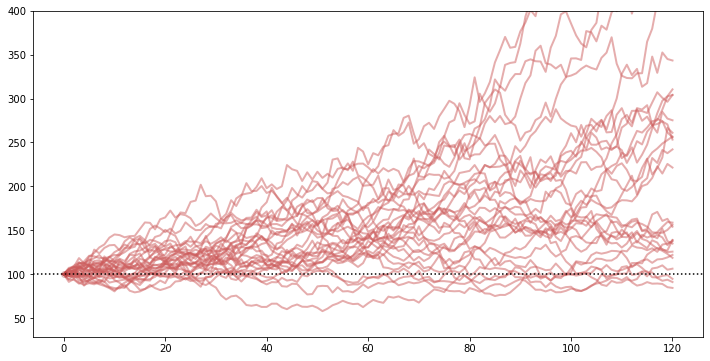

In [6]:
show_gbm(n_scenario=30, mu=.07, sigma=0.15)

In [7]:
gbm_control = widget.interactive(show_gbm,
                                 n_scenario = (1, 20,1),
                                 mu = (-.2, 0.2, 0.1),
                                 sigma = (0, 0.3, 0.1),
                                )
                                 

In [8]:
display(gbm_control)

interactive(children=(IntSlider(value=10, description='n_scenario', max=20, min=1), FloatSlider(value=0.0, des…

## interactive CPPI 

In [9]:
def show_ccpi(n_scenario=30, mu=0.07, sigma=0.15,m=3, floor=0.1, risk_free_rate=.03, y_max=100):
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenario, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=risk_free_rate, m=m, start=start,floor=floor)
    wealth = btr["Wealth"]
    y_max = wealth.values.max() * y_max /100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12,6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)
cppi_controls = widget.interactive(show_ccpi,
                                   n_scenario=widget.IntSlider(min=1, max=100, step=5, value=50),
                                   mu= (0., +0.2, 0.01),
                                   sigma= (0, .3, .05),
                                   floor= (0, 2, 0.1),
                                   risk_free_rat= (0,.5, .1),
                                   y_max = widget.IntSlider(min=0, max=100, step=1, value=50,
                                                           description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenario', min=1, step=5), FloatSlider(value=0.07, de…

In [11]:
import matplotlib.pyplot as plt 

In [25]:
def show_ccpi(n_scenario=50, mu=0.07, sigma=0.15, m=3, floor=0., risk_free_rate=.03, y_max=100):
    """plot of ccpi of monte carlo """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenario, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=risk_free_rate, m=m, start=start,floor=floor)
    wealth = btr["Wealth"]
    
    y_max = wealth.values.max() * y_max /100
    terminal_wealth = wealth.iloc[-1]
    
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12,8))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec="w", fc="indianred", orientation="horizontal")
    hist_ax.axhline(y=start, ls=":", color='black')
    
cppi_controls = widget.interactive(show_ccpi,
                                   n_scenario=widget.IntSlider(min=1, max=100, step=5, value=50),
                                   mu= (0., +0.2, 0.01),
                                   sigma= (0, .3, .05),
                                   floor= (0, 2, 0.1),
                                   risk_free_rat= (0,.5, .1),
                                   y_max = widget.IntSlider(min=0, max=100, step=1, value=50,
                                                           description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenario', min=1, step=5), FloatSlider(value=0.07, de…

interactive(children=(IntSlider(value=50, description='n_scenario', min=1, step=5), FloatSlider(value=0.07, de…

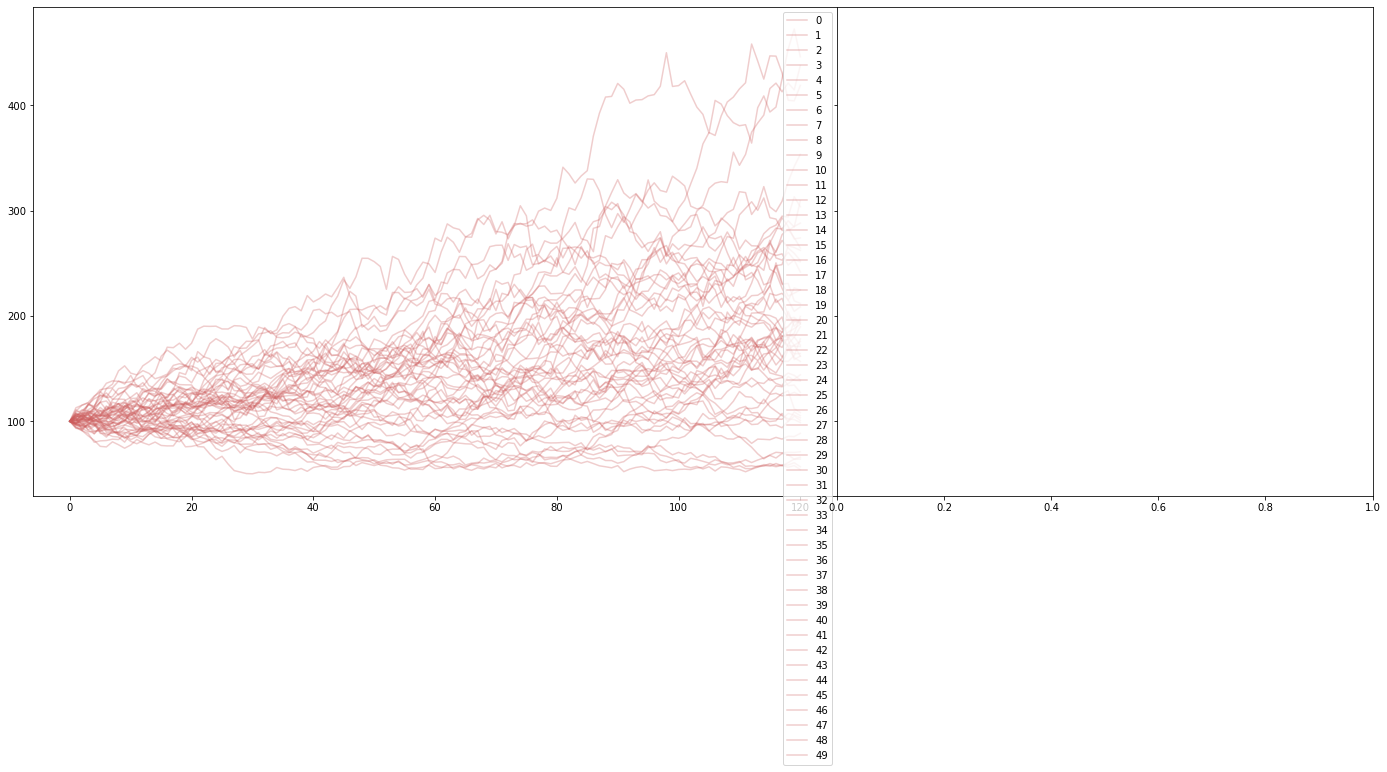

In [27]:
def show_ccpi(n_scenario=50, mu=0.07, sigma=0.15, m=3, floor=0., risk_free_rate=.03, y_max=100):
    """plot of ccpi of monte carlo """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenario, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=risk_free_rate, m=m, start=start,floor=floor)
    wealth = btr["Wealth"]
    
    y_max = wealth.values.max() * y_max /100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures / n_scenario
    
    e_shortfall = np.dot(tv-start* floor, failure_mask)/n_failures if n_failures > 0 else 0.0 
    
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=True, alpha=0.3, color="indianred")
    wealth.axhline(y=start, ls=":", color="black")
    wealth.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec="w", fc="indianred", orientation="horizontal")
    
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7,.9), xycoords="axes fraction", fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.7,.85), xycoords='axes fraction', fontsize=24)
    
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color='red', linewidth=3)
        hist_ax.annotate(f"Valditions: ${n_failures} ({p_fail * 100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy= (.7,.7), xycoords="axes fraction", fontsize=24)
    
    
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12,8))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec="w", fc="indianred", orientation="horizontal")
    hist_ax.axhline(y=start, ls=":", color='black')
    
cppi_controls = widget.interactive(show_ccpi,
                                   n_scenario=widget.IntSlider(min=1, max=100, step=5, value=50),
                                   mu= (0., +0.2, 0.01),
                                   sigma= (0, .3, .05),
                                   floor= (0, 2, 0.1),
                                   risk_free_rat= (0,.5, .1),
                                   y_max = widget.IntSlider(min=0, max=100, step=1, value=50,
                                                           description="Zoom Y Axis")
)
display(cppi_controls)